In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action= "ignore")
pd.options.display.max_columns = 85


**Life Expectancy Data (WHO)**

1-Introduction

2-The Aim of Analysis 

3-General Information of the Data

4-Data Exploration 

5-Cleaning of Row Data 

6-Filling of the Row Data

7-Overview about Outliers-Winsorization

8-General Looking on Life Expectancy Values Based other Variables 

9-Conclusions 





**1-Introduction**

In this project we will analyse the WHO Life expectancy data. We want to 

**2-The Aim of the Analysis**

We want to deal with data and first off all cleaning the data. We want to identify missing data and fill with appropriate method when possible. Also we will show the data with charts and plots

**4-Data Exploration**

In [2]:
df_ex=pd.read_csv("Life Expectancy Data-1.csv", sep=";", encoding="utf-8")


In [3]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [63]:
df_ex.describe()

,Year,Life_Expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
df_ex.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
under-five deaths                    0
 HIV/AIDS                            0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

In [65]:
df_ex.columns 

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [67]:
# Manipulating column names 
df_ex.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Alcohol_Consumption', 'Health_percentage_expenditure', 'Hepatitis_B_Imm',
       'Measles', 'BMI', 'under_five_deaths', 'Polio_Imm', 'Total_Goverment_Expenditure',
       'Diphtheria_Imm', 'HIV/AIDS_0_4', 'GDP_pCapita','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [8]:
df_ex.head()

,Country,Year,Status,Life_Expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**5-Cleaning of Row Data**



**Dealing with Missing Values**

In [9]:
total_missing = df_ex.isnull().sum().sort_values(ascending = False)
pct_missing = total_missing/len(df_ex)*100
pct_missing = pct_missing.round(1)
missing_df = pd.concat([total_missing, pct_missing], axis = 1, keys=["Total", "Pct"])


In [10]:
def missing_df_al(df):
    
    total_missing = df.isnull().sum().sort_values(ascending = False)
    pct_missing = total_missing/len(df)*100
    pct_missing = pct_missing.round(1)
    missing_df = pd.concat([total_missing, pct_missing], axis = 1, keys=["Total", "Pct"])
    #missing_df.columns = ["Total", "Pct"]
    return missing_df[missing_df.Total > 0]

In [11]:
missing_df_al(df_ex)


,Total,Pct
Population,652,22.2
Hepatitis_B,553,18.8
GDP,448,15.2
Total_Expenditure,226,7.7
Alcohol,194,6.6
Income_composition_of_resources,167,5.7
Schooling,163,5.5
thinness_5_9_years,34,1.2
thinness_1_19_years,34,1.2
BMI,34,1.2


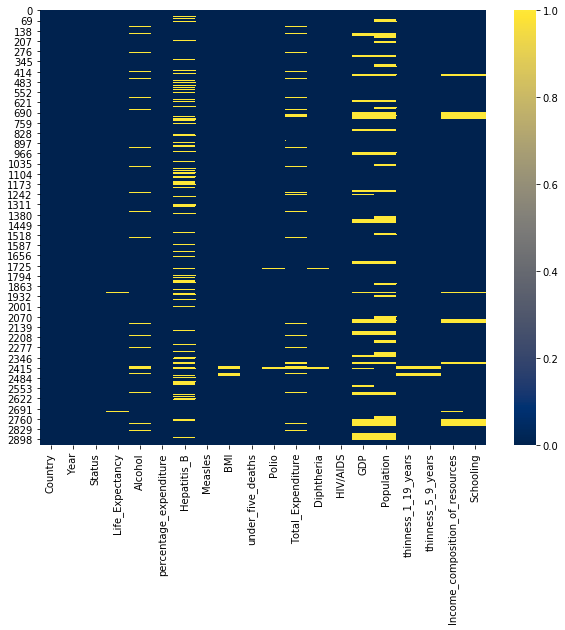

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ex.isnull(), cmap='cividis')

**Merging two tables and adding region and sub-region to our table**

In [13]:
df_cow=pd.read_csv("countries_all.csv")
df_cow.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [14]:
df_ex_merge= pd.merge(df_ex, df_cow[['region','name',"sub-region"]], left_on="Country", right_on="name")
df_ex_merge


,Country,Year,Status,Life_Expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,region,name,sub-region
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Afghanistan,Southern Asia
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Afghanistan,Southern Asia
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Afghanistan,Southern Asia
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Afghanistan,Southern Asia
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Afghanistan,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,Zimbabwe,2004,Developing,44.3,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Zimbabwe,Sub-Saharan Africa
2822,Zimbabwe,2003,Developing,44.5,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Zimbabwe,Sub-Saharan Africa
2823,Zimbabwe,2002,Developing,44.8,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Zimbabwe,Sub-Saharan Africa
2824,Zimbabwe,2001,Developing,45.3,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Zimbabwe,Sub-Saharan Africa


In [15]:
df_ex_mergedf_ex_merge.Population.isnull()].groupby("Country").Year.count()

Country
Antigua and Barbuda                                     16
Bahamas                                                 16
Bahrain                                                 16
Barbados                                                16
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Congo                                                   16
Cook Islands                                             1
Cuba                                                    16
Czechia                                                 16
Côte d'Ivoire                                           16
Dominica                                                 1
Egypt                                                   16
Eritrea                                                  4
Gambia                                                  16
Grenada                                                 16
Iran (Islamic Republic of)                      

In [16]:
df_ex_merge.corr()


,Year,Life_Expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.167073,-0.048231,0.031649,0.108138,-0.092247,0.115087,-0.043128,0.091304,0.088458,0.139446,-0.141571,0.101685,0.017009,-0.042165,-0.046077,0.238792,0.208585
Life_Expectancy,0.167073,1.000000,0.410022,0.388773,0.253129,-0.145748,0.572394,-0.211738,0.474099,0.217836,0.485326,-0.570417,0.462639,-0.024357,-0.471704,-0.465864,0.737240,0.755397
Alcohol,-0.048231,0.410022,1.000000,0.347479,0.080048,-0.038474,0.338714,-0.104946,0.222392,0.303124,0.226354,-0.062291,0.355389,-0.035362,-0.430193,-0.418137,0.454273,0.550367
percentage_expenditure,0.031649,0.388773,0.347479,1.000000,0.017359,-0.055121,0.226960,-0.086261,0.152469,0.177300,0.145428,-0.104731,0.899342,-0.026041,-0.254227,-0.256038,0.383780,0.389773
Hepatitis_B,0.108138,0.253129,0.080048,0.017359,1.000000,-0.117718,0.154228,-0.228450,0.496601,0.054528,0.612240,-0.123030,0.083839,-0.124466,-0.115903,-0.123045,0.199103,0.232496
Measles,-0.092247,-0.145748,-0.038474,-0.055121,-0.117718,1.000000,-0.169295,0.528201,-0.119285,-0.090791,-0.122589,0.045663,-0.077012,0.265741,0.233445,0.229946,-0.132676,-0.137839
BMI,0.115087,0.572394,0.338714,0.226960,0.154228,-0.169295,1.000000,-0.230370,0.289385,0.240337,0.285357,-0.260499,0.300808,-0.073306,-0.536718,-0.544200,0.518955,0.547764
under_five_deaths,-0.043128,-0.211738,-0.104946,-0.086261,-0.228450,0.528201,-0.230370,1.000000,-0.179170,-0.120116,-0.184178,0.047291,-0.112711,0.544268,0.465737,0.470912,-0.167069,-0.210124
Polio,0.091304,0.474099,0.222392,0.152469,0.496601,-0.119285,0.289385,-0.179170,1.000000,0.128214,0.687633,-0.196113,0.212795,-0.038097,-0.215186,-0.216459,0.389707,0.419245
Total_Expenditure,0.088458,0.217836,0.303124,0.177300,0.054528,-0.090791,0.240337,-0.120116,0.128214,1.000000,0.146457,-0.005912,0.140046,-0.079128,-0.274353,-0.281829,0.178497,0.248399


--Since population data is not completely available in many countries and the correlation between Life Expectancy is very low (0.02), I omitted the population column. In addition, the Population data can be represented by the sub-region area we added.

In [17]:
df_n1= df_ex_merge.drop(columns=["Population"])


In [18]:

df_n1[df_n1["Hepatitis_B"].isnull()].groupby("Country").Year.count()

Country
Algeria                                                  4
Angola                                                   7
Antigua and Barbuda                                      1
Argentina                                                2
Australia                                                1
                                                        ..
Uganda                                                   2
United Kingdom of Great Britain and Northern Ireland    16
Uzbekistan                                               2
Viet Nam                                                 3
Zambia                                                   5
Name: Year, Length: 94, dtype: int64

**6-Filling of the Row Data**

**Interpolation**

Filling NAN values with interpolate method with both option as having values for some rows in each countries

In [19]:
fill_na = (missing_df_al(df_n1)).index
fill_na

Index(['Hepatitis_B', 'GDP', 'Total_Expenditure', 'Alcohol',
       'Income_composition_of_resources', 'Schooling', 'thinness_5_9_years',
       'thinness_1_19_years', 'BMI', 'Polio', 'Diphtheria', 'Life_Expectancy'],
      dtype='object')

In [20]:
df_interpolate = df_n1.copy()
for col in fill_na:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

missing_df_al(df_interpolate)


,Total,Pct
GDP,309,10.9
Hepatitis_B,144,5.1
Income_composition_of_resources,87,3.1
Schooling,83,2.9
thinness_5_9_years,34,1.2
thinness_1_19_years,34,1.2
BMI,34,1.2
Alcohol,17,0.6
Total_Expenditure,16,0.6
Life_Expectancy,10,0.4


In [21]:
df_interpolate[df_interpolate["Hepatitis_B"].isnull()]

,Country,Year,Status,Life_Expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,region,name,sub-region
705,Denmark,2015,Developed,86.0,9.64,0.000000,NaN,9,58.8,0,93.0,1.80,93.0,0.1,5314.64416,1.1,0.9,0.923,19.2,Europe,Denmark,Northern Europe
706,Denmark,2014,Developed,84.0,9.64,10468.762920,NaN,27,58.4,0,94.0,1.80,94.0,0.1,62425.53920,1.1,0.9,0.926,19.2,Europe,Denmark,Northern Europe
707,Denmark,2013,Developed,81.0,9.50,10261.763000,NaN,17,58.1,0,94.0,11.25,94.0,0.1,61191.19263,1.1,0.9,0.924,18.7,Europe,Denmark,Northern Europe
708,Denmark,2012,Developed,80.0,9.26,928.417079,NaN,2,57.7,0,94.0,1.98,94.0,0.1,5857.52100,1.1,0.9,0.922,18.4,Europe,Denmark,Northern Europe
709,Denmark,2011,Developed,79.7,10.47,10251.108720,NaN,84,57.4,0,91.0,1.87,91.0,0.1,61753.66700,1.1,0.9,0.910,16.9,Europe,Denmark,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,12.22,0.000000,NaN,189,6.1,4,92.0,7.98,92.0,0.1,NaN,0.7,0.5,NaN,NaN,Europe,United Kingdom of Great Britain and Northern I...,Northern Europe
2678,United Kingdom of Great Britain and Northern I...,2003,Developed,78.3,11.85,0.000000,NaN,460,59.5,4,91.0,7.81,91.0,0.1,NaN,0.7,0.5,NaN,NaN,Europe,United Kingdom of Great Britain and Northern I...,Northern Europe
2679,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,11.44,0.000000,NaN,314,58.8,4,91.0,7.57,91.0,0.1,NaN,0.7,0.5,NaN,NaN,Europe,United Kingdom of Great Britain and Northern I...,Northern Europe
2680,United Kingdom of Great Britain and Northern I...,2001,Developed,78.0,10.91,0.000000,NaN,73,58.2,4,91.0,7.31,91.0,0.1,NaN,0.7,0.5,NaN,NaN,Europe,United Kingdom of Great Britain and Northern I...,Northern Europe


In [22]:
fill_na = (missing_df_al(df_interpolate)).index

for col in fill_na:
    for sub_region in df_interpolate["sub-region"].unique():
        col_fill=df_interpolate.loc[df_interpolate["sub-region"]==sub_region, col]
        df_interpolate.loc[df_interpolate["sub-region"]==sub_region, col] = df_interpolate.loc[df_interpolate["sub-region"]==sub_region, col].fillna(col_fill.mean())
        
missing_df_al(df_interpolate)

,Total,Pct


**Correlation**

Correlation between all variables

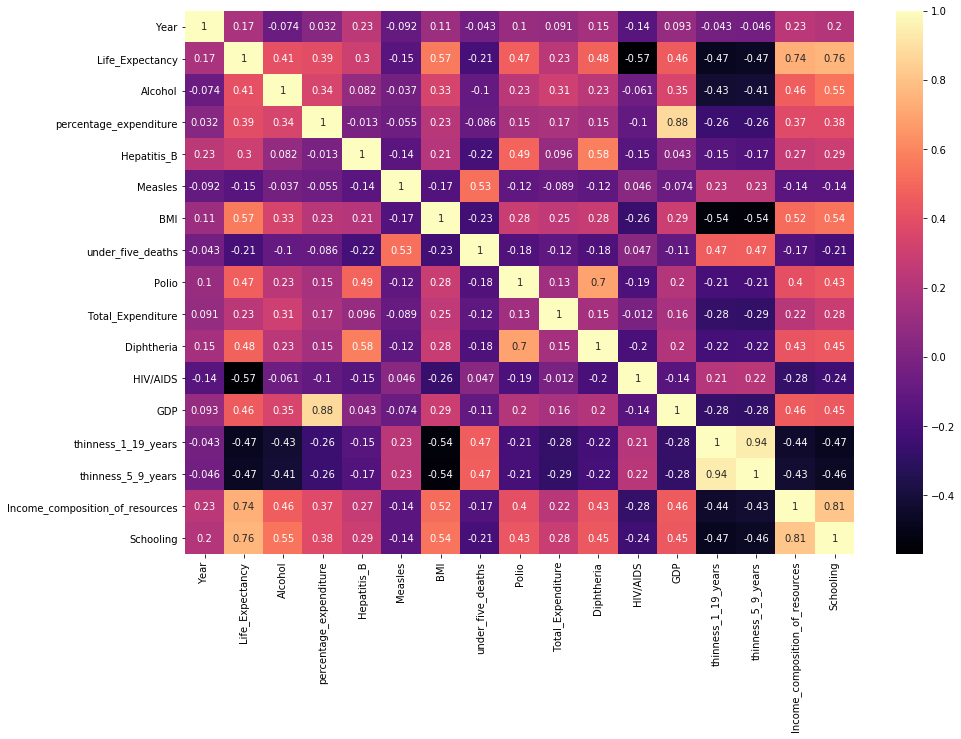

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_interpolate.corr(), annot=True, cmap='magma')
plt.show()



When only considering correlations based on sicknesses, Life Expectancy has high negative correlation with HIV/AIDS . It also has medium negative correlation with thinness_1_19_years and thinness_5_9_years, und low negative correlation with Measless.

Immunization Diphtheria , Polio and  Hepatitis_B have medium positive correlation between Life expectancy.


The other higher positive correlations with Life Expectancy are Schooling and Income and medium correlation with Life Expectancy are Alcohol, GDP und BMI und  Goverment Percentage expenditure

In [24]:
numerical_features = df_interpolate.dtypes[df_interpolate.dtypes != 'object'].index
categorical_features = df_interpolate.dtypes[df_interpolate.dtypes == 'object'].index
numerical_features

Index(['Year', 'Life_Expectancy', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio',
       'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

**Bar Plot**

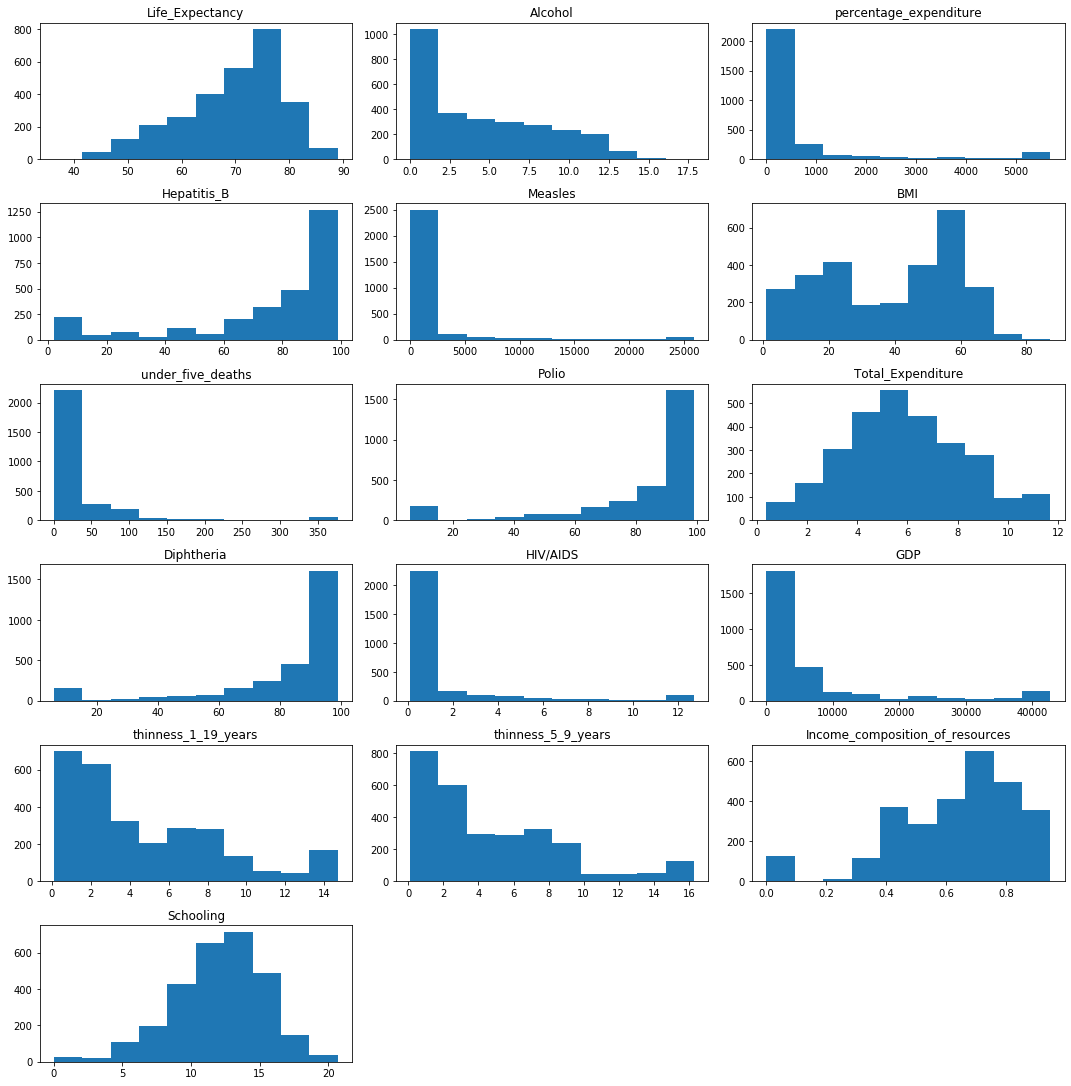

In [74]:
plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_features[1:]):
    plt.subplot(12,3,i+1)
    plt.hist(df_interpolate[col], bins=10)
    plt.title(col)
plt.tight_layout()
plt.show()


**Outlier detection**

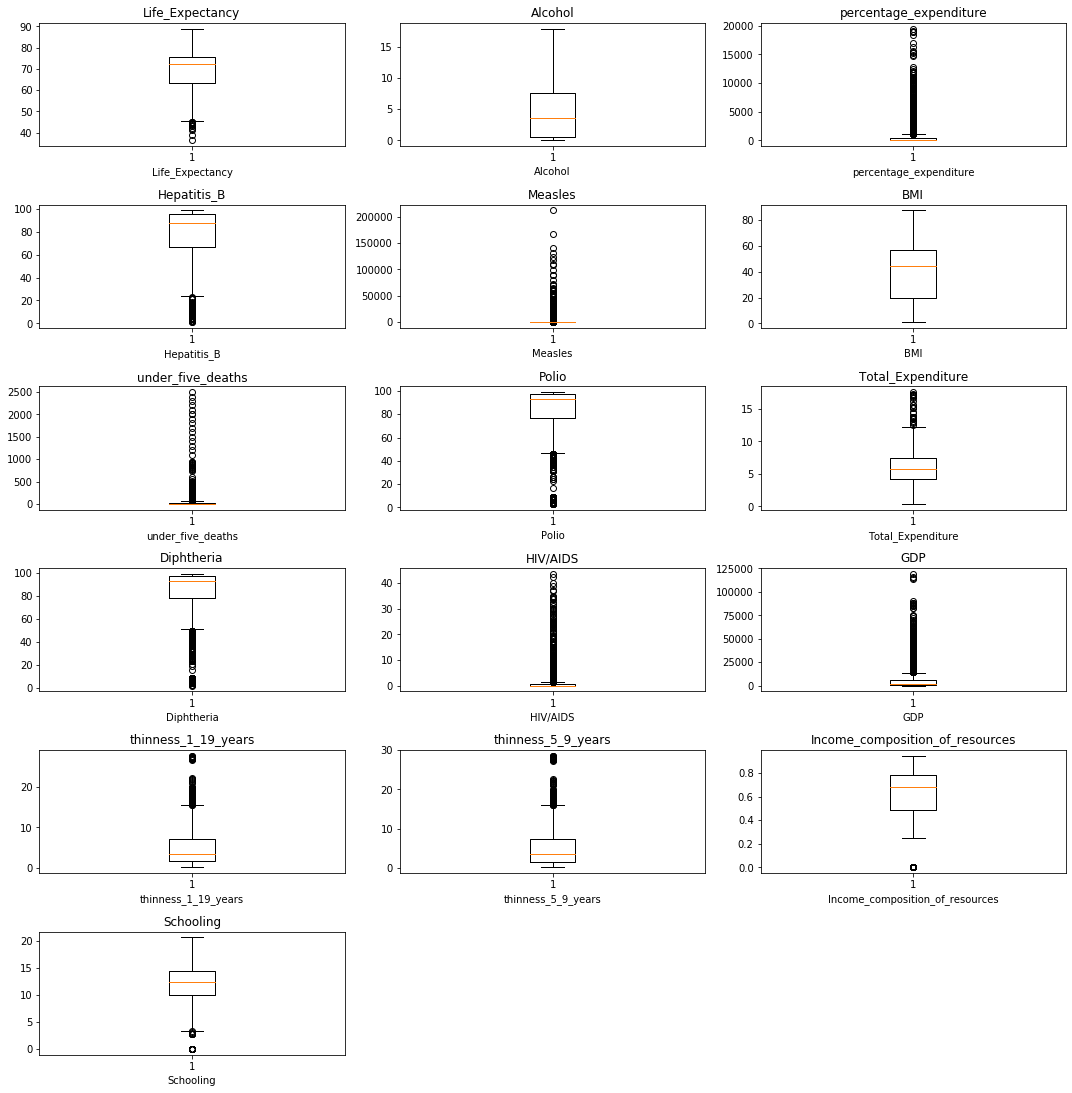

In [30]:
plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_features[1:]):
    
    plt.subplot(12,3,i+1)
    plt.boxplot(df_interpolate[col])
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()
plt.show()

**7-Overview about Outliers-Winsorization**

**Winsoration**

Winsoration and Finding best limit for Winsorize for Each Variables

In [27]:
# from scipy.stats import zscore
# zscr = zscore(df_interpolate["percentage_expenditure"])

# for threshold in range(1,5):
#     print("threshold:",threshold)
#     print("outliers:", len((np.where(zscr > threshold)[0])))

In [28]:
from scipy.stats.mstats import winsorize

def winsorizing(col): 
    upper= col.median() + col.std()*3
    for limit in np.arange(0.01, 0.20, 0.01):
        if np.max(winsorize(col,(0,limit))) < upper:
            return limit
    return None 

In [32]:
limit= winsorizing(df_interpolate['Schooling'])
limit

0.01

In [ ]:
numerical_features

In [33]:
df_interpolate["percentage_expenditure"]= winsorize(df_interpolate["percentage_expenditure"], (0,0.04))
df_interpolate["Hepatitis_B"]= winsorize(df_interpolate["Hepatitis_B"], (0.01,0))
df_interpolate["Measles"]= winsorize(df_interpolate["Measles"], (0,0.02))
df_interpolate["under_five_deaths"]= winsorize(df_interpolate["under_five_deaths"], (0,0.02))
df_interpolate["Polio"]= winsorize(df_interpolate["Polio"], (0.01,0))
df_interpolate["Total_Expenditure"]= winsorize(df_interpolate["Total_Expenditure"], (0,0.02))
df_interpolate["Diphtheria"]= winsorize(df_interpolate["Diphtheria"], (0.01,0))
df_interpolate["HIV/AIDS"]= winsorize(df_interpolate["HIV/AIDS"], (0,0.03))
df_interpolate["GDP"]= winsorize(df_interpolate["GDP"], (0,0.04))
df_interpolate["thinness_1_19_years"]= winsorize(df_interpolate["thinness_1_19_years"], (0,0.04))
df_interpolate["thinness_5_9_years"]= winsorize(df_interpolate["thinness_5_9_years"], (0,0.03))
df_interpolate["thinness_5_9_years"]= winsorize(df_interpolate["thinness_5_9_years"], (0,0.01))


**8-General Looking on Life Expectancy Values Based other Variables**

**Life Expectancy according to sub-region**

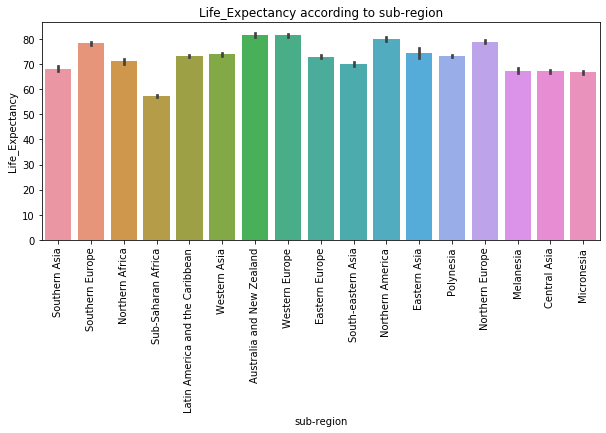

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x="sub-region", y="Life_Expectancy", data=df_interpolate)
plt.xticks(rotation=90)
plt.title("Life_Expectancy according to sub-region")
plt.show()

**Categorization die Life Expectancy**

In [36]:
cat_life_ex= ["Low", "Medium", "High","Very_High"]
df_interpolate["Cat_Life_Expectancy"]=pd.qcut(df_interpolate["Life_Expectancy"], len(cat_life_ex), labels=cat_life_ex)

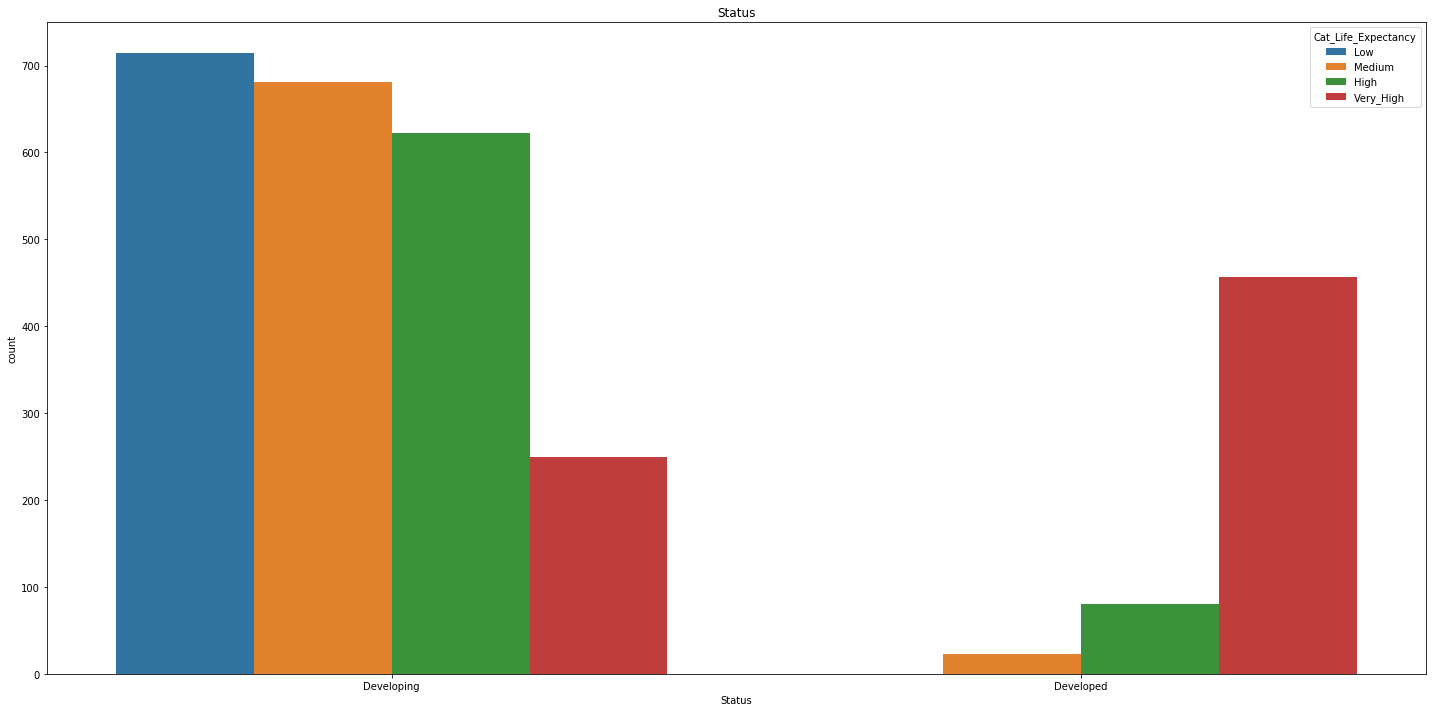

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(df_interpolate["Status"], hue=df_interpolate.Cat_Life_Expectancy)
plt.title("Status")
plt.tight_layout()
plt.show()

**Life Expectancy by Sub-regions**

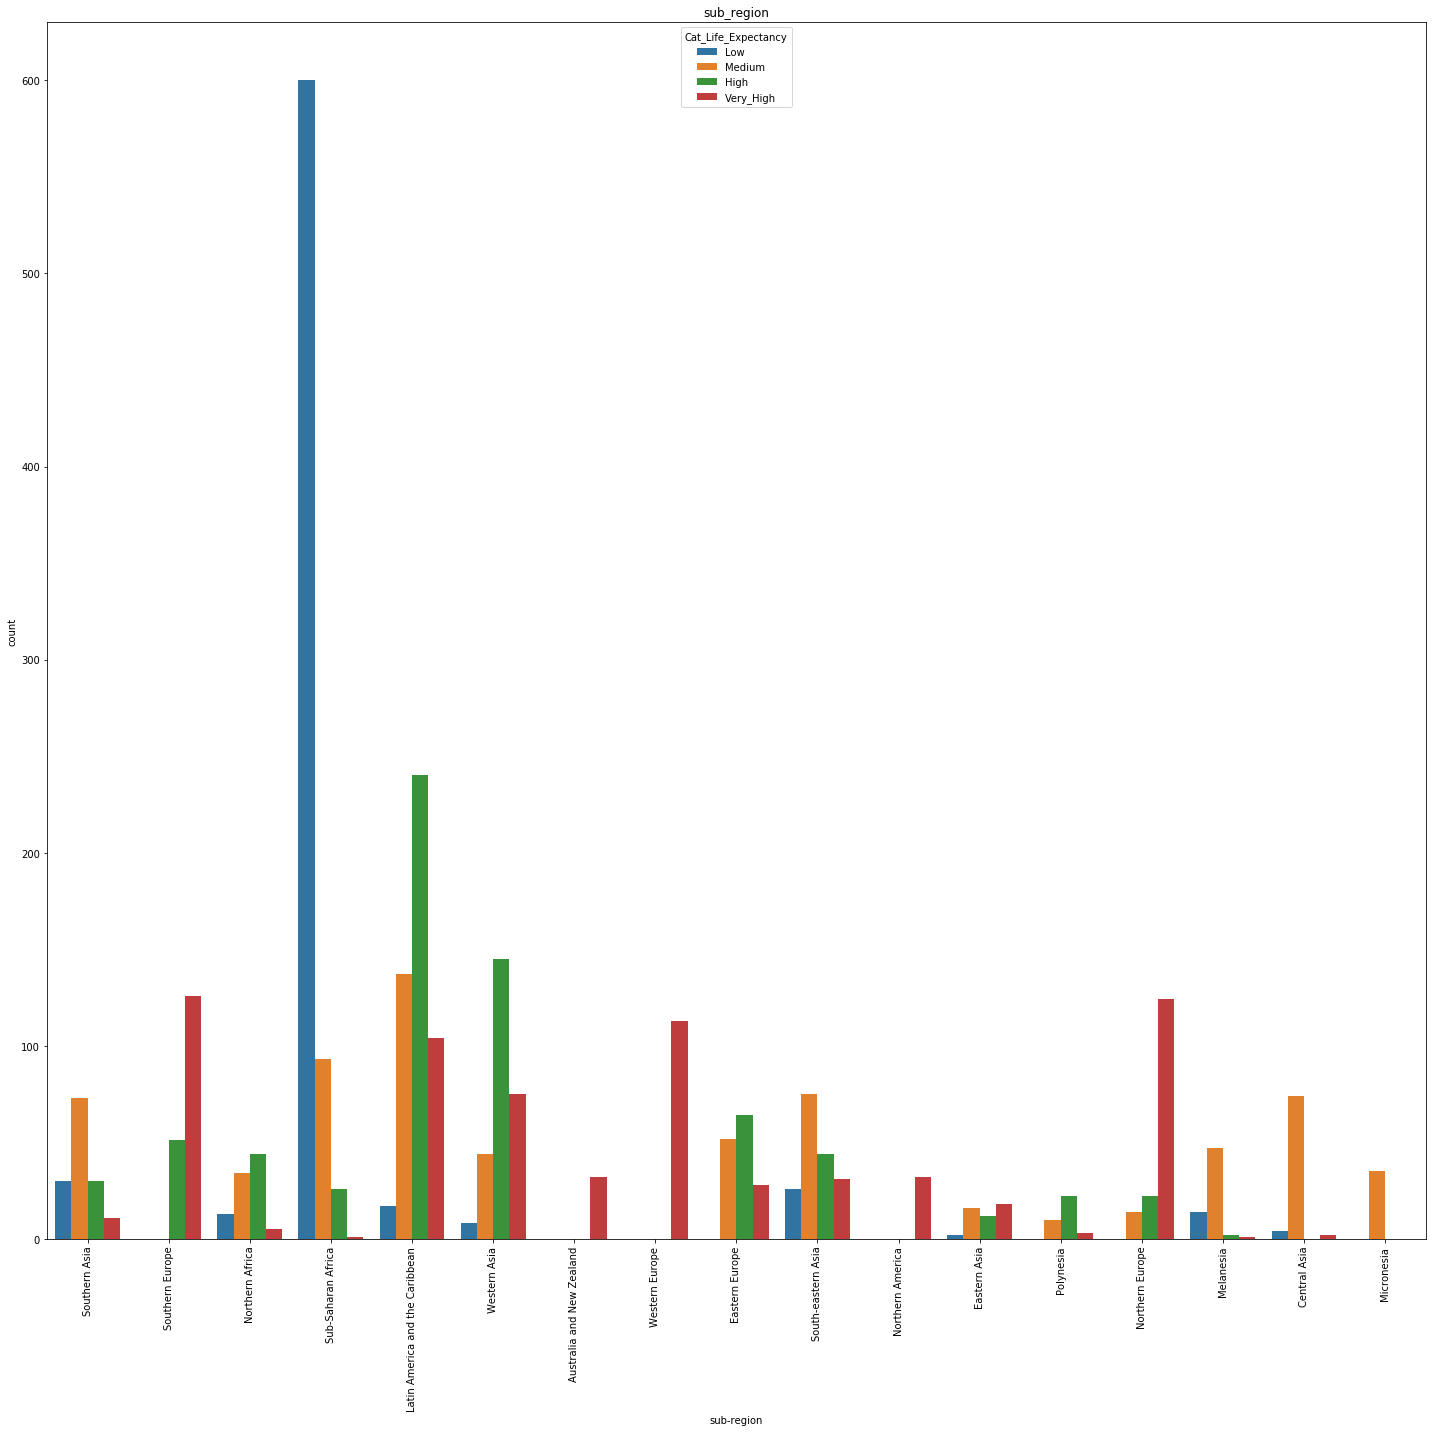

In [38]:
 plt.figure(figsize=(20,20))
sns.countplot(df_interpolate["sub-region"], hue=df_interpolate.Cat_Life_Expectancy)
plt.title("sub_region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Life Expectancy by Years**

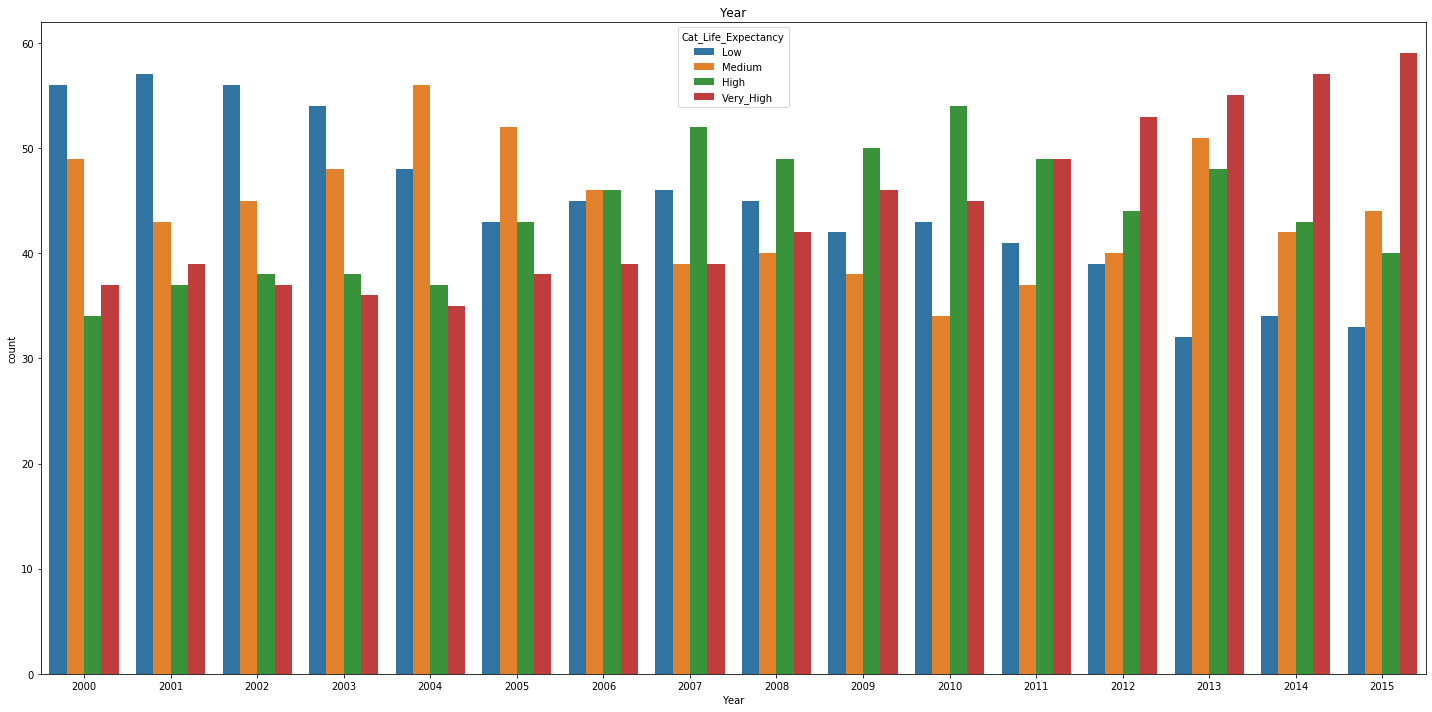

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(df_interpolate["Year"], hue=df_interpolate.Cat_Life_Expectancy)
plt.title("Year")
plt.tight_layout()
plt.show()

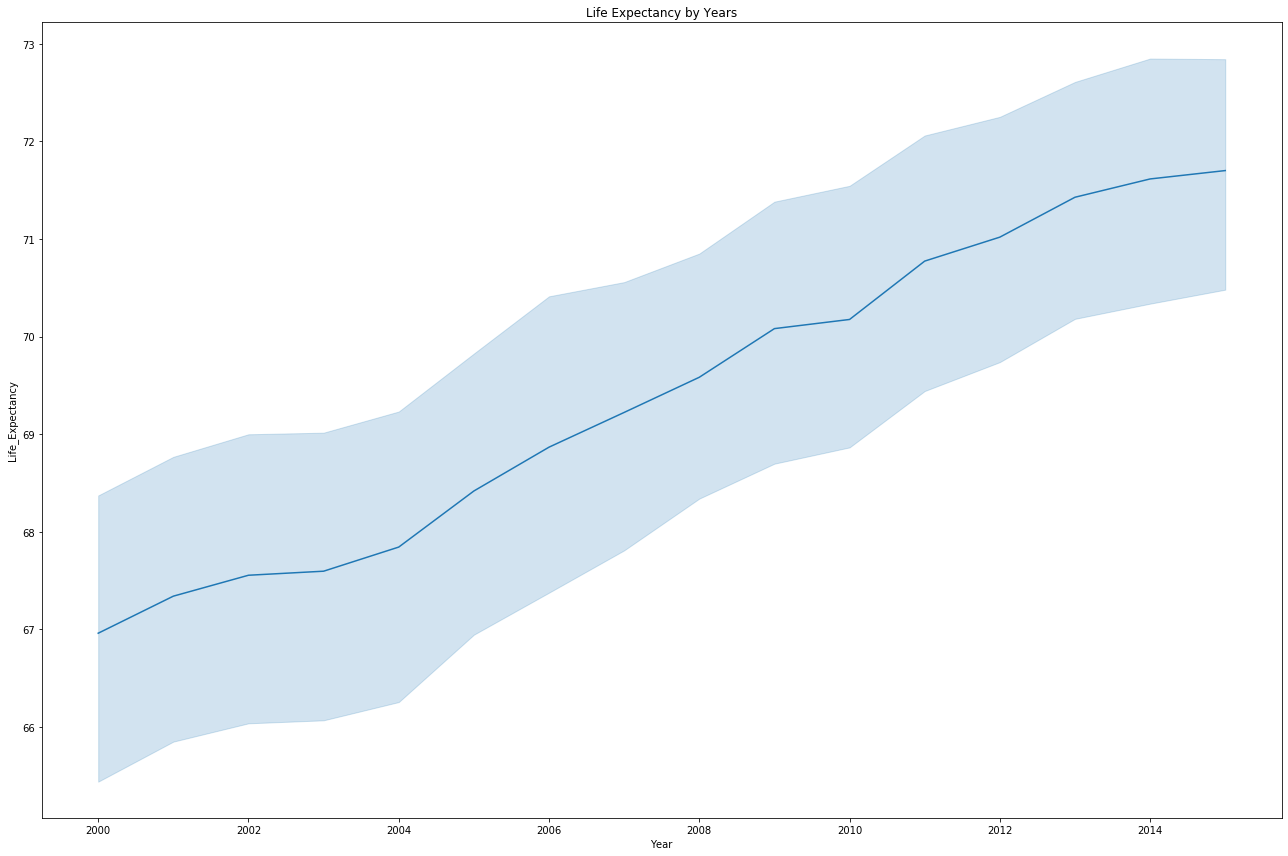

In [88]:
plt.figure(figsize=(18,12))
sns.lineplot(data=df_interpolate, x="Year", y="Life_Expectancy")
# sns.lineplot(data=df_interpolate, x="Year", y="Life_Expectancy", hue="Cat_Life_Expectancy")
plt.title("Life Expectancy by Years")
plt.tight_layout()
plt.show()

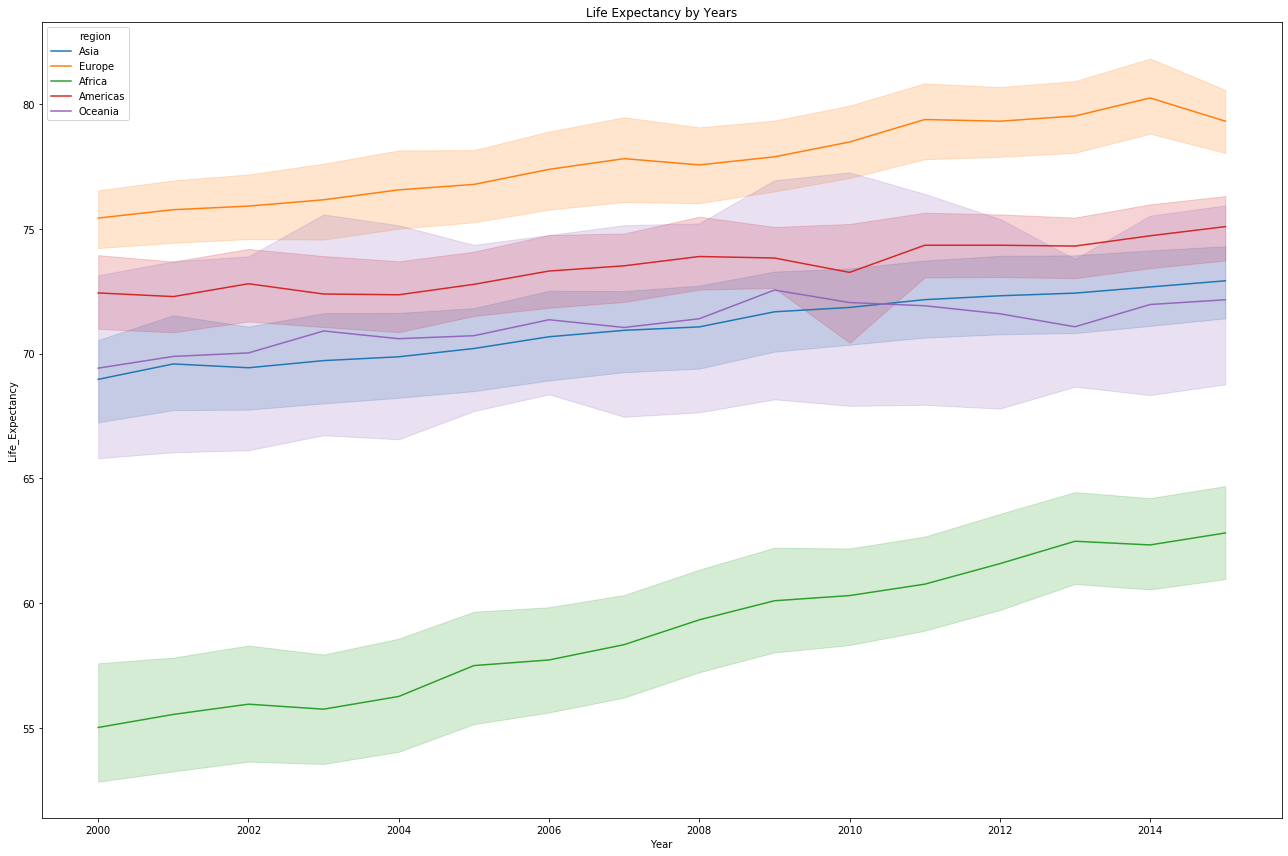

In [87]:
plt.figure(figsize=(18,12))
sns.lineplot(data=df_interpolate, x="Year", y="Life_Expectancy", hue="region")
# sns.lineplot(data=df_interpolate, x="Year", y="Life_Expectancy", hue="Cat_Life_Expectancy")
plt.title("Life Expectancy by Years")
plt.tight_layout()
plt.show()

**Life Expectancy scatter plot by Numerical Features**

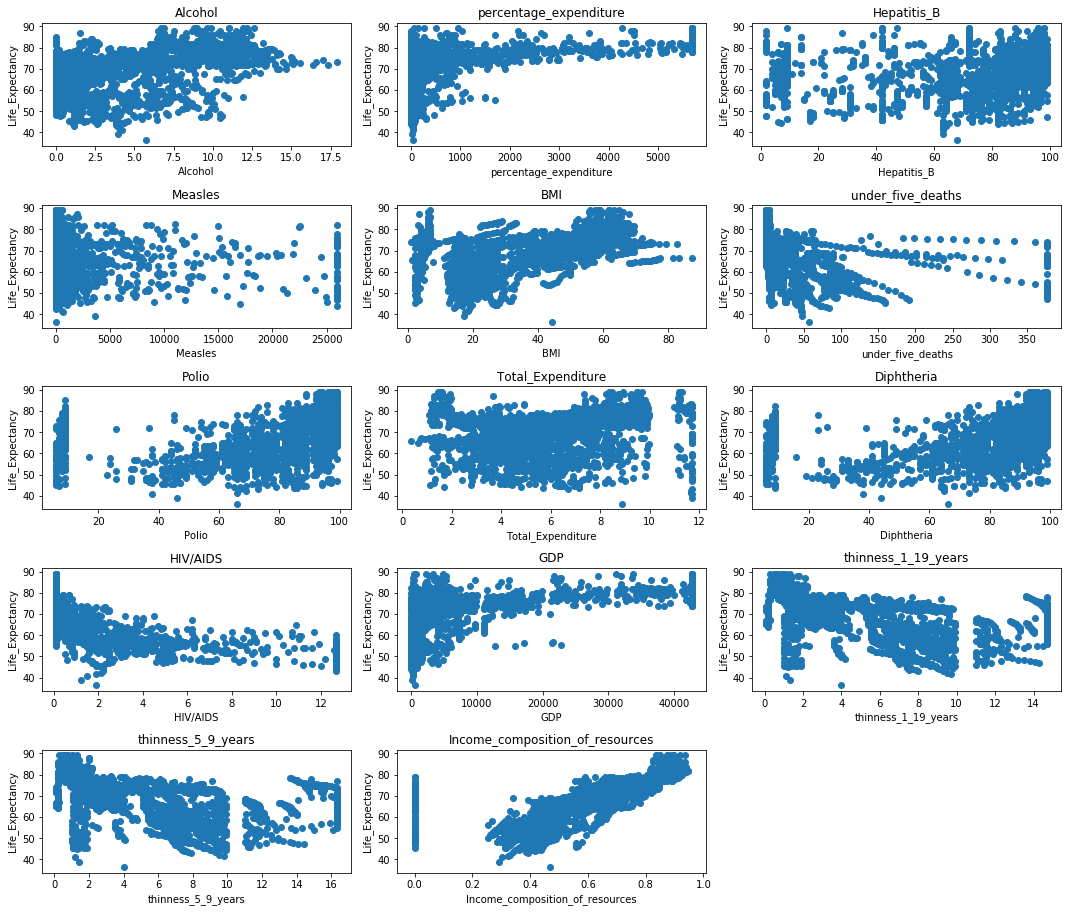

In [75]:
plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_features[2:-1]):
    plt.subplot(12,3,i+1)
    plt.scatter(df_interpolate[col], df_interpolate.Life_Expectancy)
    plt.ylabel("Life_Expectancy")
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# df_p=df_interpolate[['Life_Expectancy', 'Income_composition_of_resources', 'Schooling']]
# sns.pairplot(data=df_p, hue='Life_Expectancy')
# plt.show()


**General View in Life Expectancy by Grouping Countries with GDP Values Based on Regions**

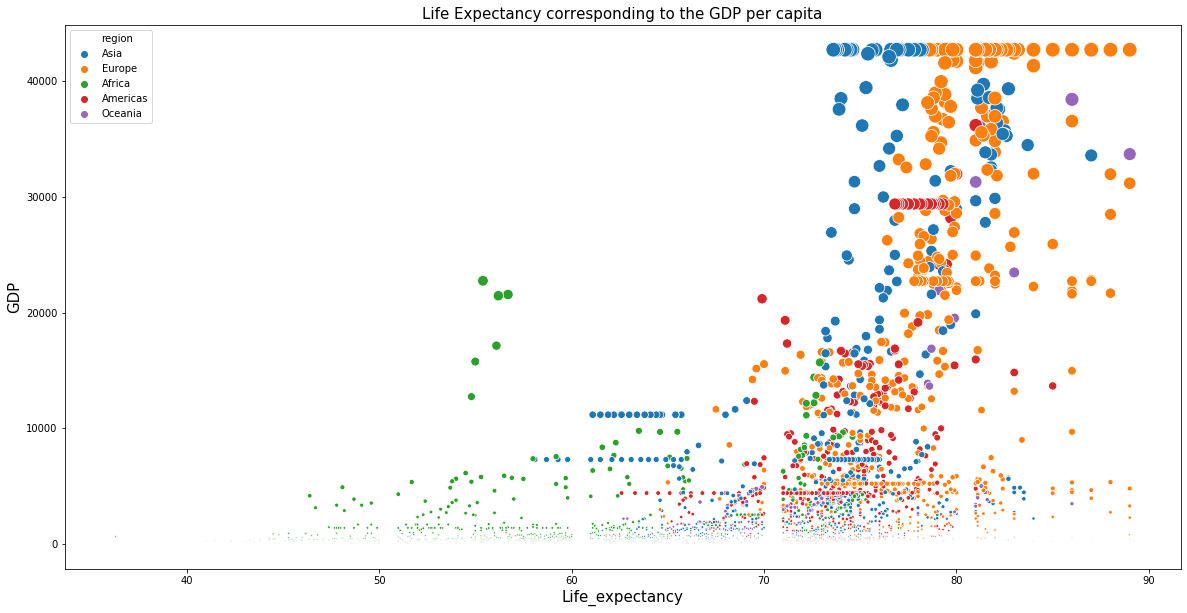

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='GDP', 
                hue='region',
                data=df_interpolate,
                 s=df_interpolate.GDP/200);
plt.title('Life expectancy corresponding to the GDP per capita',size=15)               
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('GDP', size =15)
plt.show()

**The relationship between Life Expectancy and Schooling**

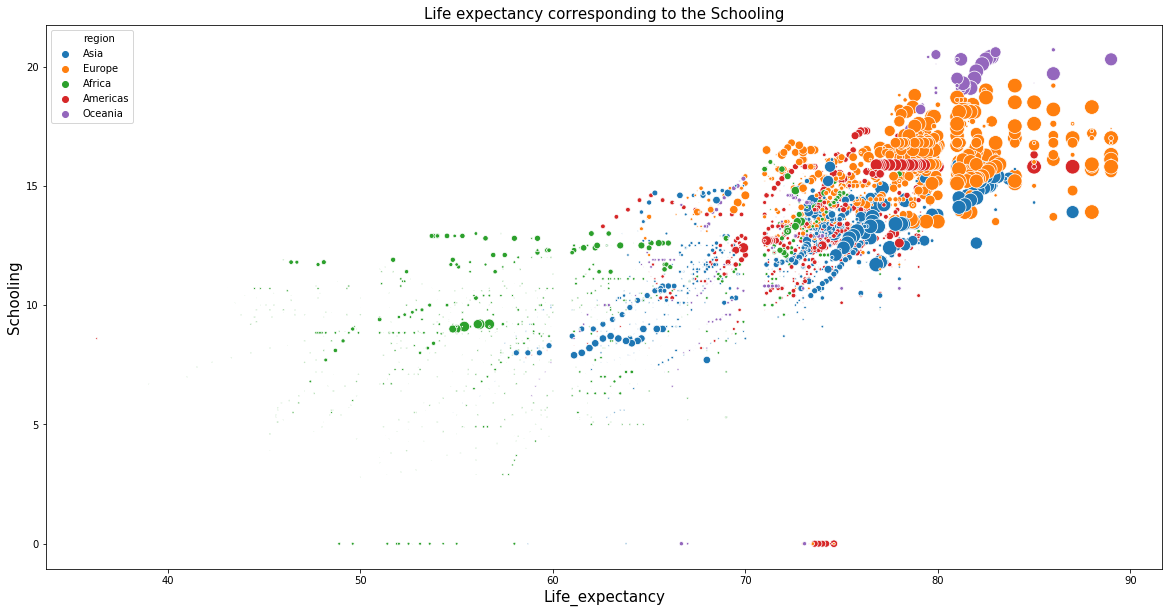

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='Schooling', 
                hue='region',
                data=df_interpolate,
               s=df_interpolate.GDP/200);
                
plt.title('Life expectancy corresponding to the Schooling',size=15)  
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Schooling', size =15)
plt.show()


In [1]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='Income_composition_of_resources', 
                hue='region',
                data=df_interpolate,
               s=df_interpolate.GDP/200);
                
plt.title('Life expectancy corresponding to the Human Development Index in terms of income',size=15)  
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Human Development Index in terms of income', size =15)
plt.show()


NameError: name 'plt' is not defined

**The relationship between Life Expectancy and alkohol consumption**

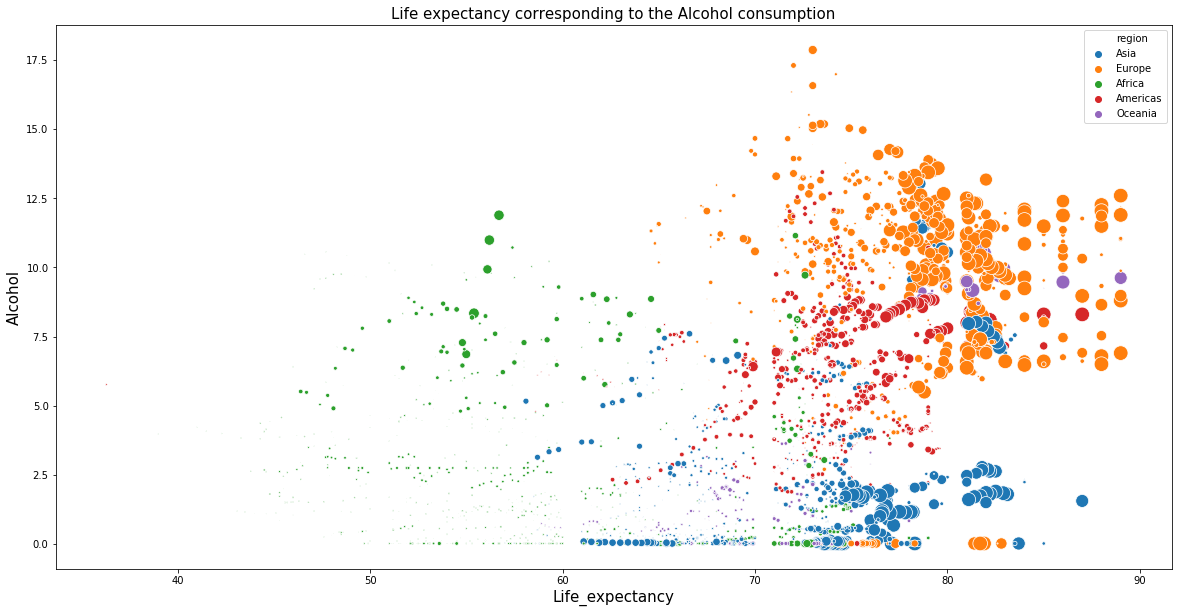

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='Alcohol', 
                hue='region',
                data=df_interpolate,
               s=df_interpolate.GDP/200);
plt.title('Life expectancy corresponding to the Alcohol consumption',size=15)                  
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

**Life expectancy corresponding to the Alcohol consumption in Developed Countries**

In [48]:
df_int_developing = df_interpolate[df_interpolate.Status=="Developing"]
df_int_developed = df_interpolate[df_interpolate.Status=="Developed"]

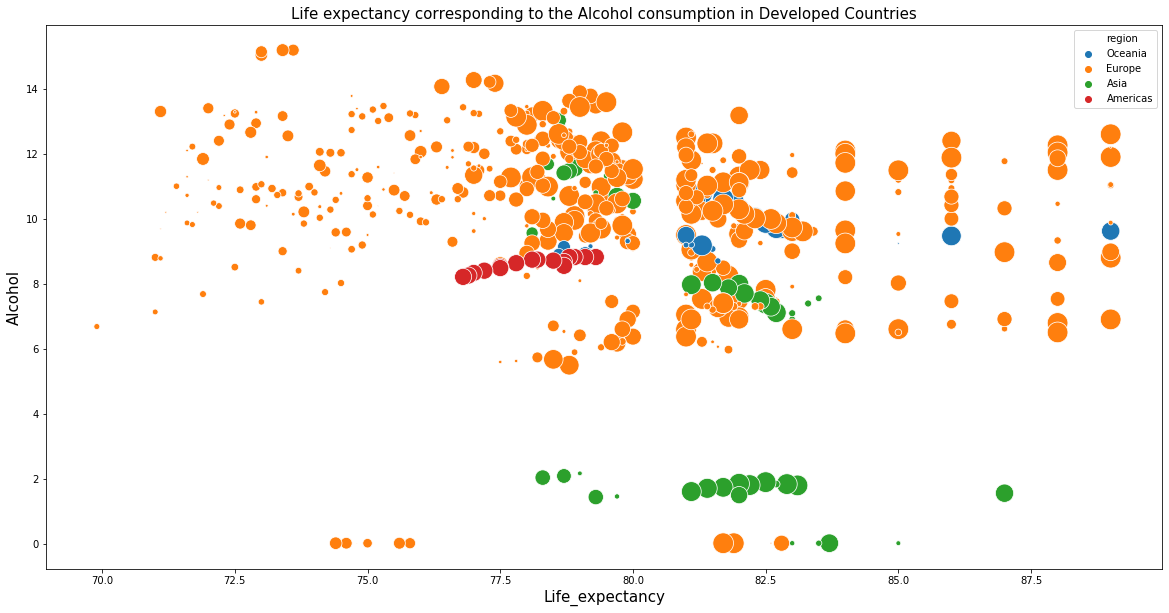

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='Alcohol', 
                hue='region',
                data=df_int_developed,
               s=df_int_developed.GDP/100);
plt.title('Life expectancy corresponding to the Alcohol consumption in Developed Countries',size=15)                    
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

**Life expectancy corresponding to the Alcohol consumption in Developing Countries**

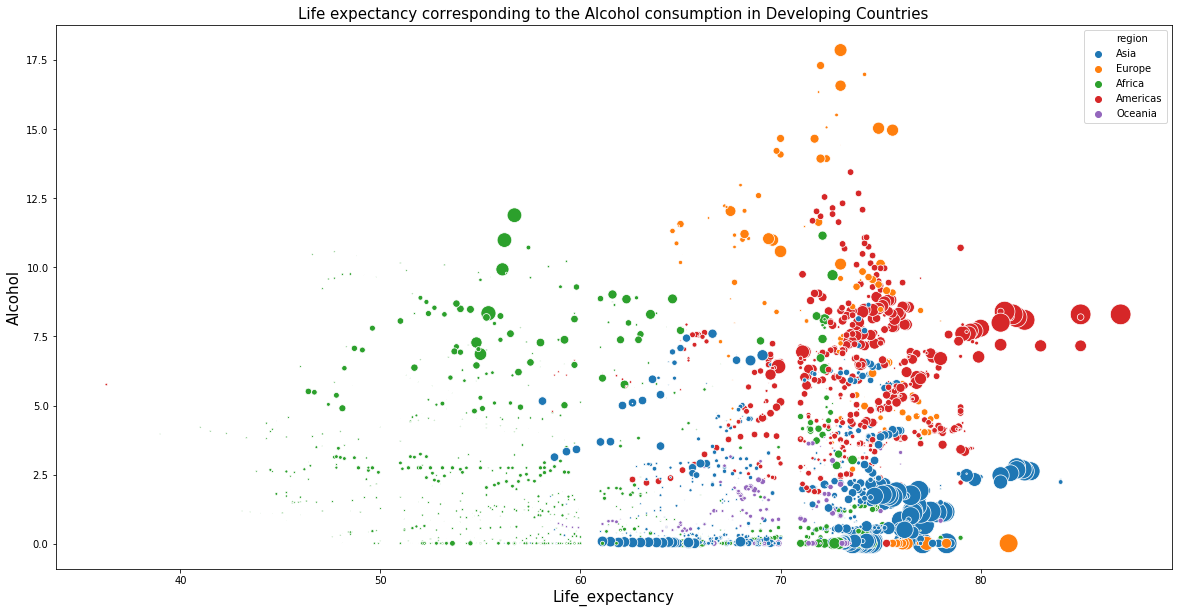

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Life_Expectancy', 
                y='Alcohol', 
                hue='region',
                data=df_int_developing,
               s=df_int_developing.GDP/100);

plt.title('Life expectancy corresponding to the Alcohol consumption in Developing Countries',size=15)  
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

**9-Conclusions**

First, I tried to understand the data. I tried to understand how the missing data could be represented in the data. For this, I first explored the data. I performed the necessary data cleaning steps to make the data ready for analysis. For this I used Interpolation techniques to fix the missing data problem. Then I made Outlier analysis and based on the results I tried to solve the outlier problem by applying Winsoration techniques. When the data was ready for analysis, I researched what affects Life Expectancy with graphics. According to the results, I found that Life Expectancy has increased by an average of 5 years between the last 2000-2015 years. This result was very important to me. When we examine by regions, Life Expectancy was lower in African countries and higher in Europe and America. Then, I tried to put forward what positive developments can increase Life Expectancy. According to the results I found, I revealed the positive effect of vaccination, income level and education rate on Life expectancy. In addition, I have seen that some diseases AIDS/HIV and Thinness, that is, nutritional deficiency, have negative effects on Life Expectancy. As a result, based on these results, it can be estimated that the Average Life Expectancy will increase by 3-5 years in the next 15 years.